In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import plotly.graph_objects as go
from matplotlib.pyplot import figure

In [2]:
#importing databases of stock data
googl_data = pd.read_csv('C:/Users/Jonat/Desktop/Springboard/Data/Data/Data/GOOGL/GOOGL.csv',parse_dates=['Date'],index_col='Date')

In [3]:
#checking data
googl_data.info(),googl_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4020 entries, 2004-08-19 to 2020-08-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4020 non-null   float64
 1   High       4020 non-null   float64
 2   Low        4020 non-null   float64
 3   Close      4020 non-null   float64
 4   Adj Close  4020 non-null   float64
 5   Volume     4020 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 219.8 KB


(None,
 Open         0
 High         0
 Low          0
 Close        0
 Adj Close    0
 Volume       0
 dtype: int64)

In [4]:
#only need the Adj Close data for this project
df = googl_data[['Adj Close','Volume']]

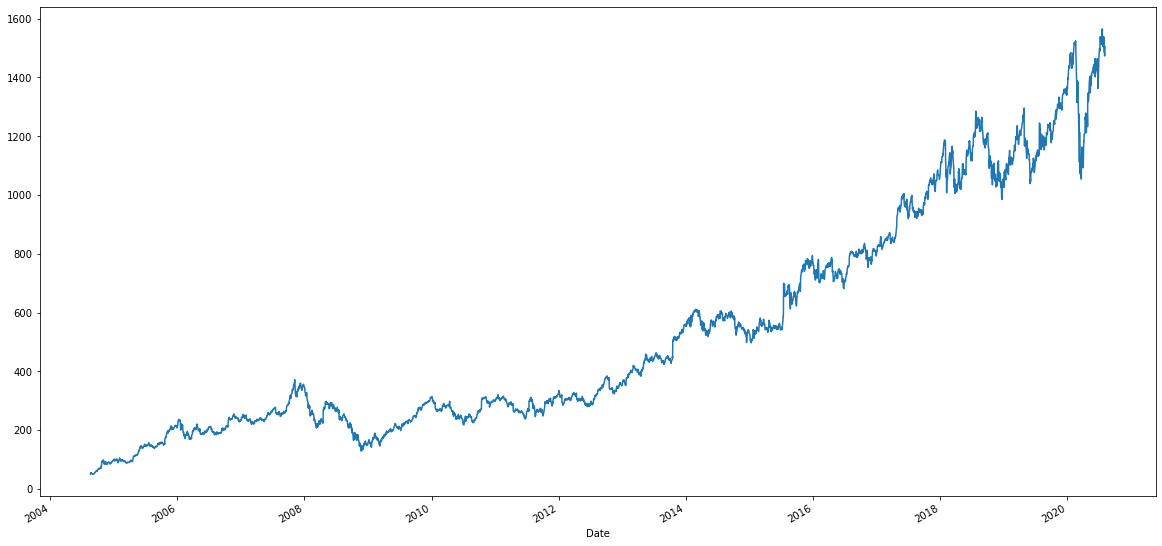

In [5]:
#Plot of data 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
df['Adj Close'].plot(ax=ax)

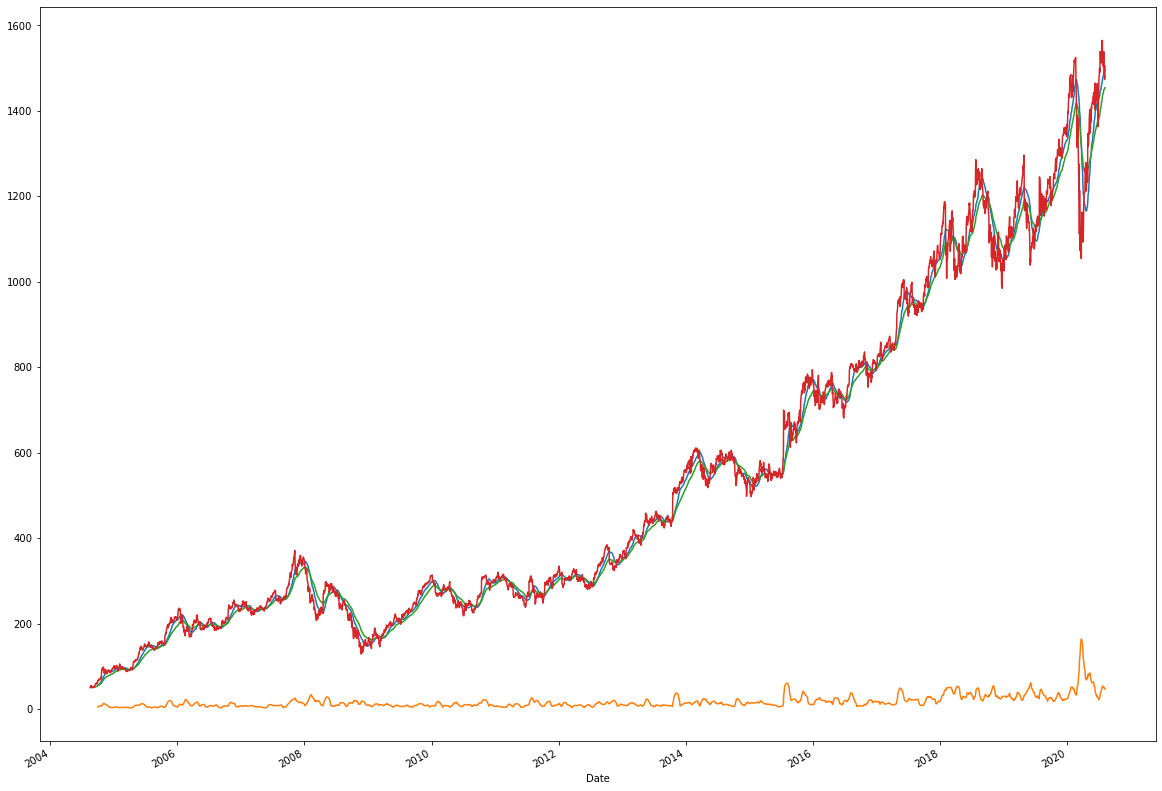

In [6]:
#Rolling data,std,mean and exponential rolling mean of data over a 30day period 
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
df['Adj Close'].rolling(30).mean().plot(ax=ax)
df['Adj Close'].rolling(30).std().plot(ax=ax)
df['Adj Close'].ewm(30,adjust=False).mean().plot(ax=ax)
df['Adj Close'].plot(ax=ax)

In [7]:
#Creating functions of indicators to add to data frame to check which ones are best for predicting future stock price

In [8]:
# function bollinger band chart: SMA (middle), The upper and lower bands are typically 2 standard deviations +/- 
#from a 20-day simple moving average, but can be modified.
def bollinger_band(df,col):
    rolling_mean = df[col].rolling(20).mean()
    rolling_std = df[col].rolling(20).std()
    
    bollinger_high = rolling_mean + (rolling_std * 2)
    bollinger_low = rolling_mean - (rolling_std * 2)
    
    bollinger_band_df =  pd.DataFrame({'Bollinger High':bollinger_high,'Bollinger Low':bollinger_low,'SMA':rolling_mean}
                                      ,index=df.index)
    
    
    return bollinger_band_df

In [9]:
bollinger_band(df,'Adj Close')

,Bollinger High,Bollinger Low,SMA
Date,,,
2004-08-19,NaN,NaN,NaN
2004-08-20,NaN,NaN,NaN
2004-08-23,NaN,NaN,NaN
2004-08-24,NaN,NaN,NaN
2004-08-25,NaN,NaN,NaN
...,...,...,...
2020-07-31,1565.101421,1477.404585,1521.253003
2020-08-03,1566.596917,1474.220088,1520.408502
2020-08-04,1568.587394,1470.567611,1519.577502


In [10]:
#MACD Functiom Moving Average Convergence Divergence (MACD) is calculated by subtracting the 26-period exponential moving average (EMA) from the 12-period EMA.
#Along with the MACD line (from subtracting the 12 period EMA from the 16 period EMA) the chart commonly will include a signal
#line plotted on top of the MACD. This signal line is a 9 day EMA of the MACD
def MACD(df,col):
    exp12 = df[col].ewm(12,adjust=False).mean()
    exp26 = df[col].ewm(26,adjust=False).mean()
    
    macd = exp12 - exp26
    return macd
 
MACD(df,'Adj Close')

Date
2004-08-19     0.000000
2004-08-20     0.159105
2004-08-23     0.321838
2004-08-24     0.375140
2004-08-25     0.444010
                ...    
2020-07-31    41.966758
2020-08-03    39.649552
2020-08-04    37.099531
2020-08-05    34.958086
2020-08-06    33.986437
Name: Adj Close, Length: 4020, dtype: float64

In [11]:
#On Balance Volume Function
def OBV(df,col,col2,today,end):
    
    
    end = df.index.get_loc(end)
    
    
    obv_list = []
    today = df.index.get_loc(today)
    obv =  0 #df[col2].loc[today]

    for day1 in range(end-today+1):
        
        if df[col].iloc[today] == df[col].iloc[today-1]:
            obv = obv
        if df[col].iloc[today] > df[col].iloc[today-1]:
            obv = obv + df[col2].iloc[today]
        if df[col].iloc[today] < df[col].iloc[today-1]:
            obv = obv - df[col2].iloc[today]
    
        today+=1  

        obv_list.append(obv)
    
    return obv_list

In [12]:
df['Volume'].loc['2004-09-22']

7581200

In [13]:
OBV(df,'Adj Close','Volume','2004-09-22','2004-11-30')

[7581200,
 16116800,
 6993400,
 -72700,
 16856300,
 47372700,
 33614700,
 48739500,
 61762200,
 76735400,
 63354000,
 77469000,
 66399500,
 55927400,
 67592900,
 87359100,
 97801200,
 110995900,
 125032200,
 106922400,
 84199800,
 113349600,
 187059600,
 252522400,
 207952900,
 234639100,
 264303000,
 222020400,
 246445700,
 223775800,
 196026200,
 167235900,
 127609400,
 149970600,
 127864400,
 106597700,
 136538700,
 103080000,
 126859100,
 85066200,
 48836700,
 15610800,
 33131800,
 8420200,
 33221900,
 63753300,
 76700500,
 98012300,
 113396900]

In [14]:
#adding indicators to dataframe
df['OBV'] = OBV(df,'Adj Close','Volume','2004-08-19','2020-08-06')
df['MACD'] = MACD(df,'Adj Close')
df[['Bollinger High','Bollinger Low','Bollinger Mid']] = bollinger_band(df,'Adj Close')

<ipython-input-14-7e7bccbaed6f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OBV'] = OBV(df,'Adj Close','Volume','2004-08-19','2020-08-06')
<ipython-input-14-7e7bccbaed6f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MACD'] = MACD(df,'Adj Close')
C:\Users\Jonat\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [15]:
df.tail(30)

,Adj Close,Volume,OBV,MACD,Bollinger High,Bollinger Low,Bollinger Mid
Date,,,,,,,
2020-06-25,1441.099976,1197900,1302459900,38.675025,1470.640265,1404.445746,1437.543005
2020-06-26,1362.540039,4882000,1297577900,34.848824,1481.145807,1386.842206,1433.994006
2020-06-29,1397.170044,2253700,1299831600,32.729725,1482.045413,1382.172605,1432.109009
2020-06-30,1418.050049,2014300,1301845900,31.585656,1480.967487,1380.824530,1430.896008
2020-07-01,1442.000000,2109100,1303955000,31.433987,1481.216558,1380.850458,1431.033508
2020-07-02,1469.930054,2860900,1306815900,32.323633,1486.210881,1381.419136,1433.815009
2020-07-06,1499.650024,2235600,1309051500,34.207752,1496.898643,1376.694375,1436.796509
2020-07-07,1489.920044,2118200,1306933300,35.396976,1503.398790,1374.382228,1438.890509
2020-07-08,1503.599976,1588300,1308521600,36.898856,1512.023542,1370.909478,1441.466510


In [16]:
df.dropna(inplace=True)

In [17]:
df.loc[pd.to_datetime('2004-09-16')]

Adj Close         5.704204e+01
Volume            9.266300e+06
OBV               5.405080e+07
MACD              9.077210e-01
Bollinger High    5.693317e+01
Bollinger Low     4.845272e+01
Bollinger Mid     5.269294e+01
Name: 2004-09-16 00:00:00, dtype: float64

In [18]:
df.head()

,Adj Close,Volume,OBV,MACD,Bollinger High,Bollinger Low,Bollinger Mid
Date,,,,,,,
2004-09-16,57.042042,9266300,54050800,0.907721,56.933167,48.452718,52.692943
2004-09-17,58.803802,9472500,63523300,1.124455,57.998423,48.245821,53.122122
2004-09-20,59.739738,10628700,74152000,1.351236,59.093128,47.704168,53.398648
2004-09-21,58.978977,7228700,66923300,1.518624,59.807271,47.412448,53.609860
2004-09-22,59.249249,7581200,74504500,1.673868,60.608033,47.287862,53.947948


In [19]:
#We will be predicting the next day price. We are shifting the data by 1 day
df['Adj Close Shift'] = df['Adj Close'].shift(-1)
df.dropna(inplace=True)

In [20]:
#Checking data before we split it into training and testing 
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4000 entries, 2004-09-16 to 2020-08-05
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Adj Close        4000 non-null   float64
 1   Volume           4000 non-null   int64  
 2   OBV              4000 non-null   int64  
 3   MACD             4000 non-null   float64
 4   Bollinger High   4000 non-null   float64
 5   Bollinger Low    4000 non-null   float64
 6   Bollinger Mid    4000 non-null   float64
 7   Adj Close Shift  4000 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 281.2 KB


In [21]:
#X = df.drop(columns='Adj Close').loc['2020-01-01':'2020-08-01'] 
#y = df['Adj Close'].loc['2020-01-01':'2020-08-01'].shift(1)
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3)

In [22]:
print(4000*.70)
print(df.iloc[0])
print(df.iloc[2800])
print(df.iloc[3999])

2800.0
Adj Close          5.704204e+01
Volume             9.266300e+06
OBV                5.405080e+07
MACD               9.077210e-01
Bollinger High     5.693317e+01
Bollinger Low      4.845272e+01
Bollinger Mid      5.269294e+01
Adj Close Shift    5.880380e+01
Name: 2004-09-16 00:00:00, dtype: float64
Adj Close          7.448500e+02
Volume             1.826000e+06
OBV                1.228506e+09
MACD               2.075262e+01
Bollinger High     7.451441e+02
Bollinger Low      6.383389e+02
Bollinger Mid      6.917415e+02
Adj Close Shift    7.373900e+02
Name: 2015-10-29 00:00:00, dtype: float64
Adj Close          1.479090e+03
Volume             1.457500e+06
OBV                1.304662e+09
MACD               3.495809e+01
Bollinger High     1.570188e+03
Bollinger Low      1.466516e+03
Bollinger Mid      1.518352e+03
Adj Close Shift    1.504950e+03
Name: 2020-08-05 00:00:00, dtype: float64


In [23]:
df.loc['2004-09-16':'2015-10-29'].head()

,Adj Close,Volume,OBV,MACD,Bollinger High,Bollinger Low,Bollinger Mid,Adj Close Shift
Date,,,,,,,,
2004-09-16,57.042042,9266300,54050800,0.907721,56.933167,48.452718,52.692943,58.803802
2004-09-17,58.803802,9472500,63523300,1.124455,57.998423,48.245821,53.122122,59.739738
2004-09-20,59.739738,10628700,74152000,1.351236,59.093128,47.704168,53.398648,58.978977
2004-09-21,58.978977,7228700,66923300,1.518624,59.807271,47.412448,53.609860,59.249249
2004-09-22,59.249249,7581200,74504500,1.673868,60.608033,47.287862,53.947948,60.470470


In [24]:
#Spliting the dta into training and testing
X_train = df.drop(columns=['Adj Close Shift','Adj Close']).loc['2004-09-16':'2015-10-29']
X_test = df.drop(columns=['Adj Close Shift','Adj Close']).loc['2015-10-30':'2020-08-05']
y_train = df['Adj Close Shift'].loc['2004-09-16':'2015-10-29']
y_test = df['Adj Close Shift'].loc['2015-10-30':'2020-08-05']

In [25]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

2801
1199
2801
1199


In [26]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler().fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

LM R-Squared: 0.9601543588123703
LM Mean Absolute Error: 29.782489480997704


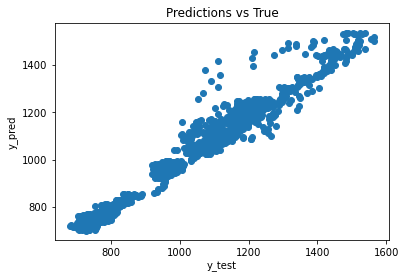

In [27]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_absolute_error
rModel = linear_model.LinearRegression(normalize=True)
rModel.fit(X_train,y_train)
y_pred = rModel.predict(X_test)
#R-Squared coefficent
lm_r2score_test = r2_score(y_test,y_pred)
print('LM R-Squared:',lm_r2score_test)
#check to see how prediction repersnt true results
plt.scatter(y_test,y_pred)
plt.title('Predictions vs True')
plt.xlabel('y_test')
plt.ylabel('y_pred')
lm_mean_abs_error = mean_absolute_error(y_test,y_pred)
print('LM Mean Absolute Error:',lm_mean_abs_error)

In [28]:
imp = rModel.coef_

for x ,y in zip(imp,X_train.columns):
    print (y ,x)
 

Volume -2.0570150941122975e-07
OBV -8.001000177781069e-10
MACD 0.6590634837092524
Bollinger High 0.4610021906731297
Bollinger Low 0.18441493751692467
Bollinger Mid 0.33460364170779006


In [29]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=42)
model_result = rfr.fit(X_train,y_train)
y_pred = model_result.predict(X_test)
r2score = r2_score(y_test,y_pred)
mean_abs_error = mean_absolute_error(y_test,y_pred)
print('R^2:',r2score)
print('Mean Absolute Error:',mean_abs_error)

R^2: -2.011540971920999
Mean Absolute Error: 310.4835942813685


([<matplotlib.axis.YTick at 0x21f29773670>,
 [Text(0, 0, 'Volume'),
  Text(0, 0, 'MACD'),
  Text(0, 0, 'Bollinger Low'),
  Text(0, 0, 'OBV'),
  Text(0, 0, 'Bollinger Mid'),
  Text(0, 0, 'Bollinger High')])

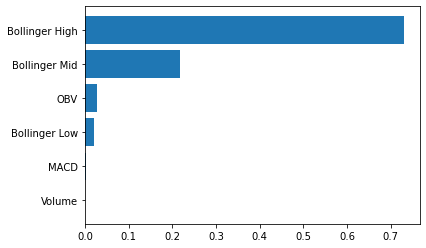

In [30]:
feature_importance = rfr.feature_importances_

sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0])

plt.barh(pos,feature_importance[sorted_idx])
plt.yticks(pos,X_train.columns[sorted_idx])